## Extracting the zip file [data]

In [1]:
import zipfile
path = "California_Housing_prices.zip"
with zipfile.ZipFile(path, 'r')as zip_ref:
    zip_ref.extractall()
print("Successfully Unzipped")

Successfully Unzipped


## Explore the data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [7]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [8]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
train_data = X_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19652,-120.86,37.50,34.0,4272.0,996.0,2916.0,962.0,1.9829,INLAND,82800.0
3712,-118.40,34.19,37.0,934.0,231.0,587.0,230.0,3.6250,<1H OCEAN,181300.0
16024,-122.46,37.73,52.0,2857.0,469.0,1431.0,496.0,5.2088,NEAR BAY,344200.0
1491,-122.02,37.95,22.0,3526.0,510.0,1660.0,508.0,5.6642,NEAR BAY,237000.0
9045,-118.13,34.68,28.0,718.0,124.0,347.0,121.0,4.0250,INLAND,102600.0
...,...,...,...,...,...,...,...,...,...,...
18966,-122.02,38.26,27.0,3440.0,787.0,2085.0,748.0,2.5896,INLAND,104700.0
2700,-115.37,32.81,32.0,741.0,191.0,623.0,169.0,1.7604,INLAND,68600.0
9608,-120.51,37.29,20.0,4927.0,1042.0,4205.0,1009.0,1.7679,INLAND,79800.0
16179,-121.28,37.96,28.0,1942.0,724.0,1618.0,638.0,0.9365,INLAND,52500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

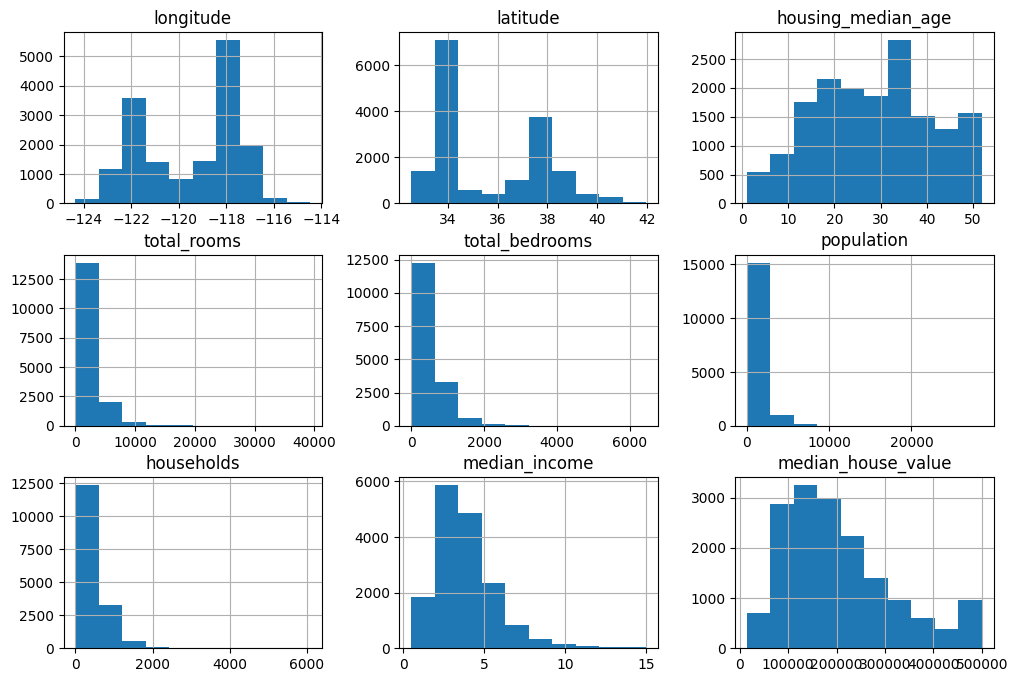

In [12]:
train_data.hist(figsize = (12, 8))

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

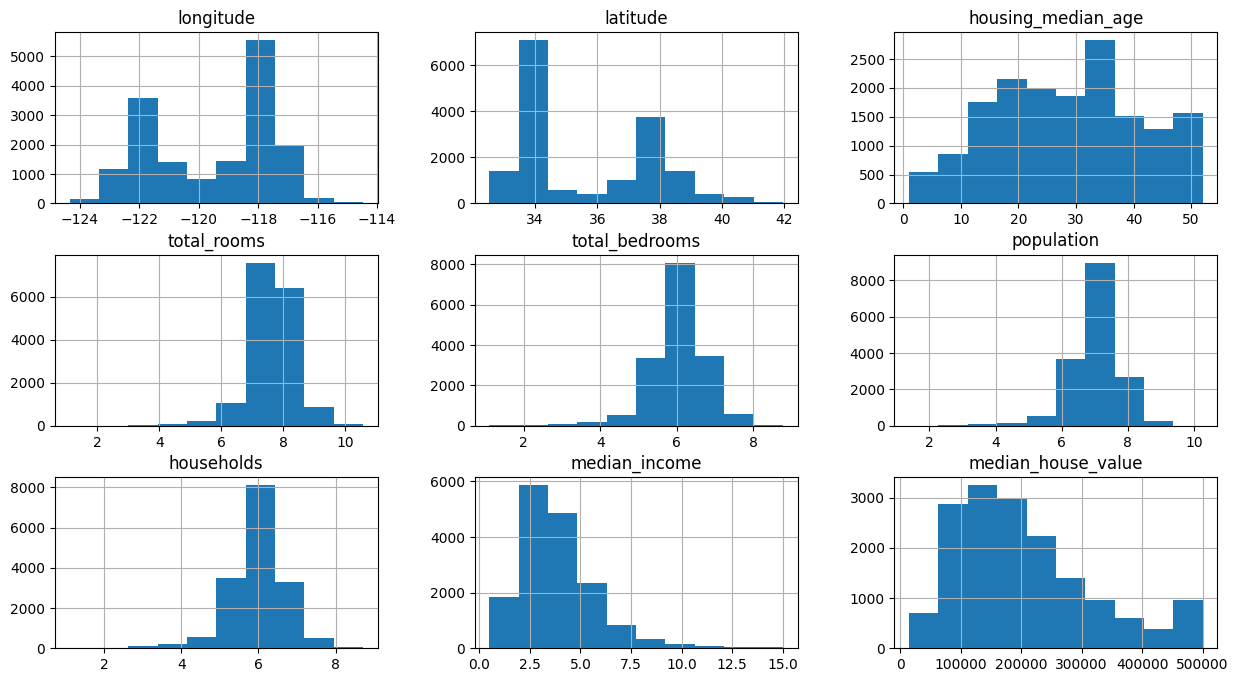

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19652,-120.86,37.50,34.0,8.360071,6.904751,7.978311,6.870053,1.9829,82800.0,False,True,False,False,False
3712,-118.40,34.19,37.0,6.840547,5.446737,6.376727,5.442418,3.6250,181300.0,True,False,False,False,False
16024,-122.46,37.73,52.0,7.957877,6.152733,7.266827,6.208590,5.2088,344200.0,False,False,False,True,False
1491,-122.02,37.95,22.0,8.168203,6.236370,7.415175,6.232448,5.6642,237000.0,False,False,False,True,False
9045,-118.13,34.68,28.0,6.577861,4.828314,5.852202,4.804021,4.0250,102600.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18966,-122.02,38.26,27.0,8.143517,6.669498,7.643004,6.618739,2.5896,104700.0,False,True,False,False,False
2700,-115.37,32.81,32.0,6.609349,5.257495,6.436150,5.135798,1.7604,68600.0,False,True,False,False,False
9608,-120.51,37.29,20.0,8.502689,6.949856,8.344267,6.917706,1.7679,79800.0,False,True,False,False,False
16179,-121.28,37.96,28.0,7.571988,6.586172,7.389564,6.459904,0.9365,52500.0,False,True,False,False,False


<Axes: >

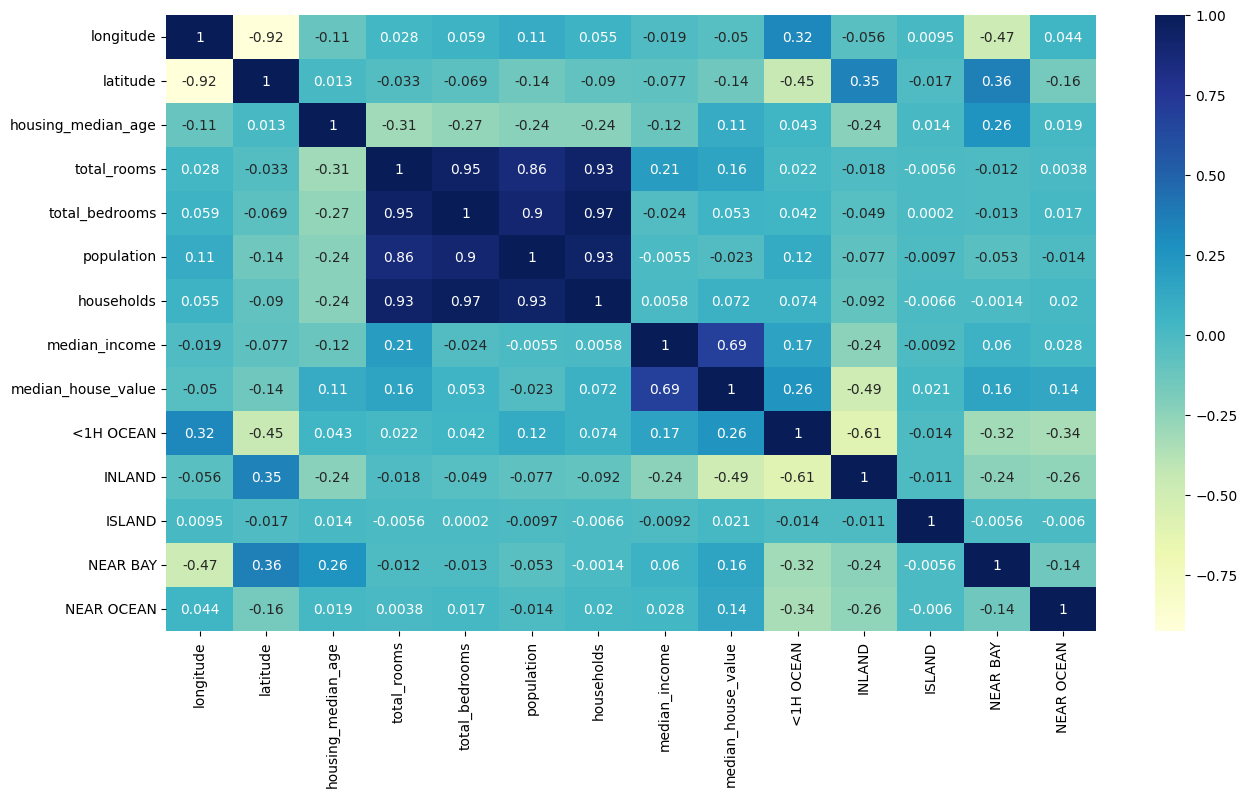

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

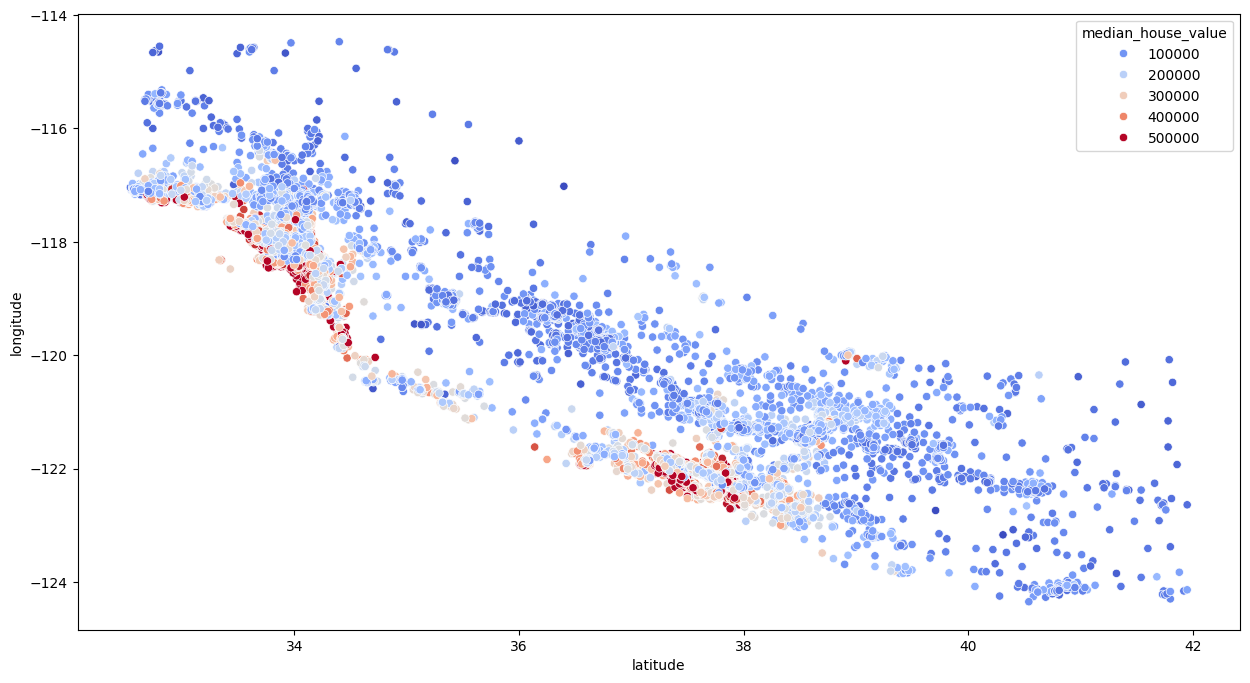

In [18]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = "latitude", y="longitude", data = train_data, hue="median_house_value", palette = "coolwarm")

In [19]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_ rooms"] = train_data["total_rooms"] / train_data["households"]

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_ rooms
19652,-120.86,37.50,34.0,8.360071,6.904751,7.978311,6.870053,1.9829,82800.0,False,True,False,False,False,0.825920,1.216886
3712,-118.40,34.19,37.0,6.840547,5.446737,6.376727,5.442418,3.6250,181300.0,True,False,False,False,False,0.796243,1.256895
16024,-122.46,37.73,52.0,7.957877,6.152733,7.266827,6.208590,5.2088,344200.0,False,False,False,True,False,0.773163,1.281753
1491,-122.02,37.95,22.0,8.168203,6.236370,7.415175,6.232448,5.6642,237000.0,False,False,False,True,False,0.763493,1.310593
9045,-118.13,34.68,28.0,6.577861,4.828314,5.852202,4.804021,4.0250,102600.0,False,True,False,False,False,0.734025,1.369241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18966,-122.02,38.26,27.0,8.143517,6.669498,7.643004,6.618739,2.5896,104700.0,False,True,False,False,False,0.818995,1.230373
2700,-115.37,32.81,32.0,6.609349,5.257495,6.436150,5.135798,1.7604,68600.0,False,True,False,False,False,0.795463,1.286918
9608,-120.51,37.29,20.0,8.502689,6.949856,8.344267,6.917706,1.7679,79800.0,False,True,False,False,False,0.817372,1.229120
16179,-121.28,37.96,28.0,7.571988,6.586172,7.389564,6.459904,0.9365,52500.0,False,True,False,False,False,0.869807,1.172152


<Axes: >

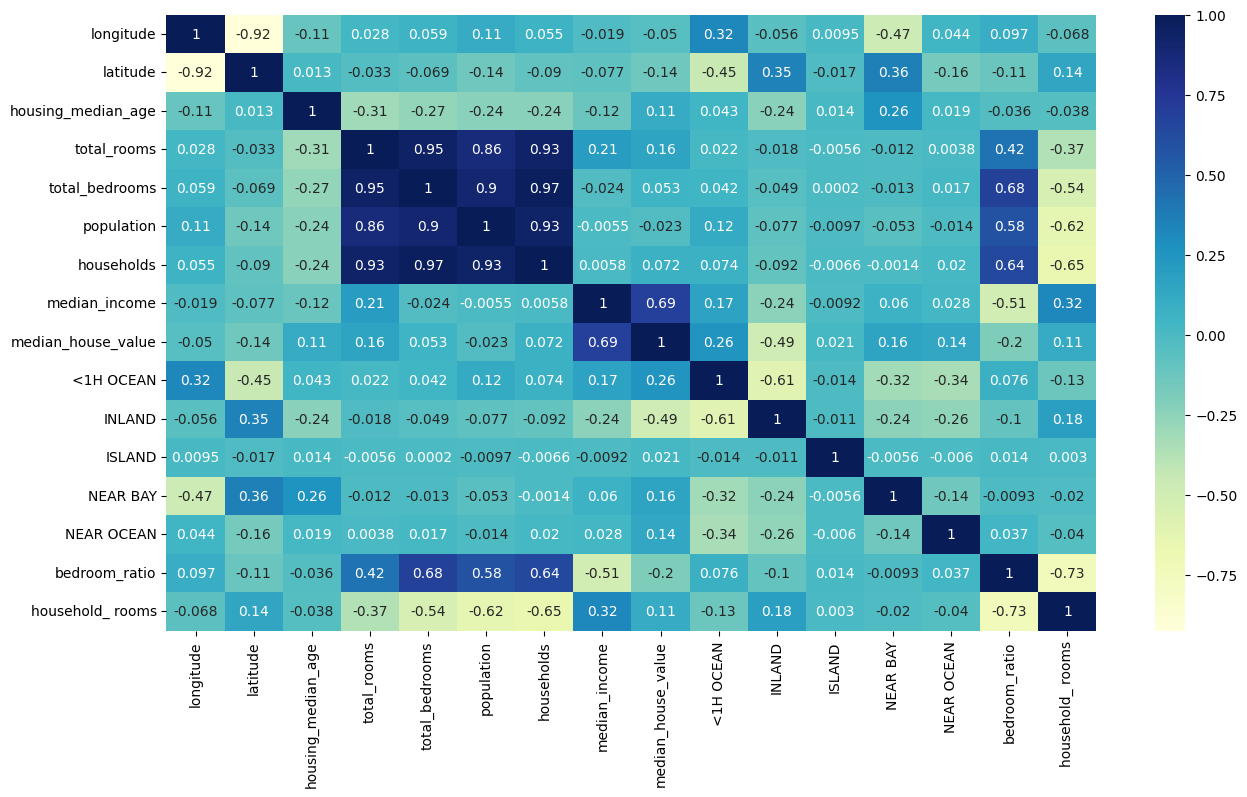

In [21]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

## Model-1 Linear_Regression_Model

In [22]:
from sklearn.linear_model import LinearRegression
X_train, y_train = train_data.drop(["median_house_value"], axis = 1) , train_data["median_house_value"]
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_ rooms"] = test_data["total_rooms"] / test_data["households"]

In [24]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_ rooms
13735,-117.20,34.04,24.0,7.370231,5.407172,6.517671,5.459586,6.0715,173400.0,False,True,False,False,False,0.733650,1.349962
18524,-122.04,36.98,51.0,6.981935,5.332719,6.206576,5.308268,2.9286,258300.0,False,False,False,False,True,0.763788,1.315294
16073,-122.49,37.75,52.0,7.708411,5.955837,7.071573,6.033086,4.8516,323800.0,False,False,False,False,True,0.772641,1.277689
4645,-118.31,34.06,47.0,8.019284,7.335634,8.349011,7.295056,1.6725,187500.0,True,False,False,False,False,0.914749,1.099276
11014,-117.82,33.76,27.0,8.080547,6.109248,7.085064,6.107023,6.5308,287800.0,True,False,False,False,False,0.756044,1.323156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,-117.59,33.91,7.0,9.232493,7.307873,8.557567,7.319865,5.4872,203400.0,False,True,False,False,False,0.791538,1.261293
14387,-117.23,32.75,21.0,7.626083,6.411818,7.031741,6.311735,2.4779,165000.0,False,False,False,False,True,0.840775,1.208239
195,-122.26,37.80,20.0,7.772332,6.659294,7.414573,6.517671,1.6929,115000.0,False,False,False,True,False,0.856795,1.192501
15070,-116.97,32.79,32.0,7.135687,5.826000,6.663133,5.713733,2.6635,113600.0,True,False,False,False,False,0.816460,1.248866


In [28]:
X_test, y_test = test_data.drop(["median_house_value"], axis = 1) , test_data["median_house_value"]

In [29]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_ rooms
13735,-117.20,34.04,24.0,7.370231,5.407172,6.517671,5.459586,6.0715,False,True,False,False,False,0.733650,1.349962
18524,-122.04,36.98,51.0,6.981935,5.332719,6.206576,5.308268,2.9286,False,False,False,False,True,0.763788,1.315294
16073,-122.49,37.75,52.0,7.708411,5.955837,7.071573,6.033086,4.8516,False,False,False,False,True,0.772641,1.277689
4645,-118.31,34.06,47.0,8.019284,7.335634,8.349011,7.295056,1.6725,True,False,False,False,False,0.914749,1.099276
11014,-117.82,33.76,27.0,8.080547,6.109248,7.085064,6.107023,6.5308,True,False,False,False,False,0.756044,1.323156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,-117.59,33.91,7.0,9.232493,7.307873,8.557567,7.319865,5.4872,False,True,False,False,False,0.791538,1.261293
14387,-117.23,32.75,21.0,7.626083,6.411818,7.031741,6.311735,2.4779,False,False,False,False,True,0.840775,1.208239
195,-122.26,37.80,20.0,7.772332,6.659294,7.414573,6.517671,1.6929,False,False,False,True,False,0.856795,1.192501
15070,-116.97,32.79,32.0,7.135687,5.826000,6.663133,5.713733,2.6635,True,False,False,False,False,0.816460,1.248866


In [30]:
y_test

13735    173400.0
18524    258300.0
16073    323800.0
4645     187500.0
11014    287800.0
           ...   
12002    203400.0
14387    165000.0
195      115000.0
15070    113600.0
13896     57400.0
Name: median_house_value, Length: 4087, dtype: float64

In [31]:
reg.score(X_test, y_test)

0.6695898967775136

In [83]:
model_1 = 0.6695898967775136*100
print(f"Model_1 Score : {model_1:.2f}%")

Model_1 Score : 66.96%


## Model-2 Random_Forest_Regression

In [59]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

model_2 = forest.fit(X_train, y_train)

In [60]:
model_2

RandomForestRegressor()

In [63]:
model_2_score = model_2.score(X_test, y_test)

In [82]:
print(f"Model_2 Score : {model_2_score*100:.2f}%")

Model_2 Score : 81.04%


## Model-3 Random_Forest_Regression with Scaled Data
#### Scaling up the data using `StandardScaler`

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
model_3 = forest.fit(X_train_s, y_train)
model_3

RandomForestRegressor()

In [79]:
model_3_score = model_3.score(X_test_s, y_test)

In [81]:
print(f"Model_3 Score : {model_3_score*100:.2f}%")

Model_3 Score : 74.42%


## Conclusion

In this house price prediction project, we embarked on a journey of data exploration, cleaning, and model development. After careful preprocessing, feature engineering, and visualization, we created three models: 
1. Model_1 - linear regression 
2. Model_2 - random forest regression 
3. Model_3 - random forest regression with scaled data 

The standout performer was the random forest regression model, achieving an impressive `81%` prediction accuracy. This underscores the significance of choosing the right algorithm and features in predictive modeling.

In summary, this project demonstrates the power of data-driven decision-making in real estate analysis, with the random forest regression model showcasing the potential for accurate house price predictions.